## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)\
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name=f"hidden_layer{i+1}")(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name=f"hidden_layer{i+1}")(x)
            
    out = keras.layers.Dense(units=output_units, 
                                   activation="softmax", 
                                   name="out_put")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [11]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor="val_loss")

EARLYSTOP_PATIENCE = [10, 25]

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i, patience in enumerate(EARLYSTOP_PATIENCE):
    keras.backend.clear_session()
    print("Numbers of exp: %i, with earlystop_patience: %s" % (i, patience))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, 
              y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[EarlyStopping(monitor="val_acc", patience=patience, verbose=1)]) 
    # 調整 earlystop 的等待次數至 10, 25 並比較結果，改變 monitor "Validation Accuracy"
    # Collect results
    exp_name_tag = ("exp-earlystop%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

W0728 23:00:30.158286 57780 deprecation_wrapper.py:119] From D:\python\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Numbers of exp: 0, with earlystop_patience: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
out_put (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0728 23:00:30.717498 57780 deprecation.py:323] From D:\python\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 28s 569us/step - loss: 1.9391 - acc: 0.2998 - val_loss: 1.7972 - val_acc: 0.3569
Epoch 2/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.7214 - acc: 0.3836 - val_loss: 1.7376 - val_acc: 0.3772
Epoch 3/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.6220 - acc: 0.4206 - val_loss: 1.5737 - val_acc: 0.4409
Epoch 4/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.5624 - acc: 0.4416 - val_loss: 1.5636 - val_acc: 0.4394
Epoch 5/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.5119 - acc: 0.4594 - val_loss: 1.5146 - val_acc: 0.4608
Epoch 6/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.4724 - acc: 0.4747 - val_loss: 1.4926 - val_acc: 0.4656
Epoch 7/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.4338 - acc: 0.4865 - val_loss: 1.5016 -

50000/50000 [==============================] - 6s 125us/step - loss: 1.2184 - acc: 0.5679 - val_loss: 1.3858 - val_acc: 0.5131
Epoch 16/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.2047 - acc: 0.5711 - val_loss: 1.3728 - val_acc: 0.5149
Epoch 17/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.1810 - acc: 0.5786 - val_loss: 1.3883 - val_acc: 0.5122
Epoch 18/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.1647 - acc: 0.5843 - val_loss: 1.4119 - val_acc: 0.5115
Epoch 19/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.1408 - acc: 0.5940 - val_loss: 1.3795 - val_acc: 0.5142
Epoch 20/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.1261 - acc: 0.5997 - val_loss: 1.3453 - val_acc: 0.5323
Epoch 21/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.0991 - acc: 0.6076 - val_loss: 1.4217 - val_acc: 0.5085
Epoch 22/50
50000/50000 [==============

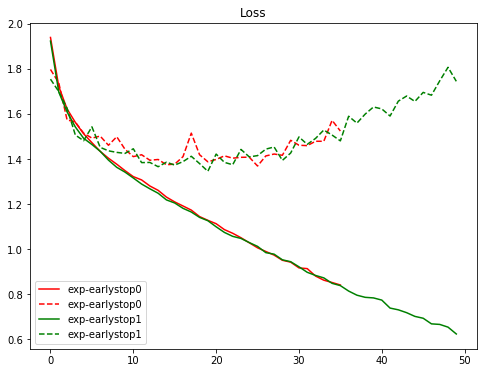

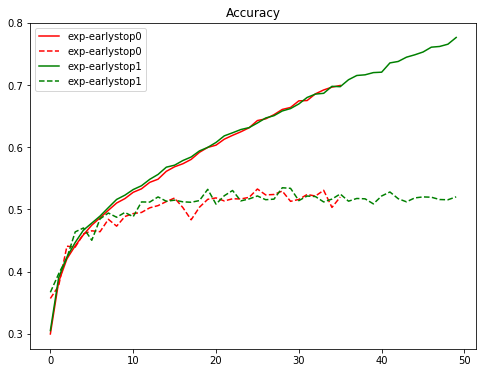

In [12]:

color_bar = ["r", "g"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()